In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [4]:
with open("../dataset/train.json", "r") as json_file:
    train_json = json.load(json_file)

In [5]:
train_json.keys()

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])

In [6]:
train_json['categories'] 

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

In [7]:
class_names = []
for class_dict in train_json['categories']:
    class_names.append(class_dict['name'])
print(f"class_names: {class_names}")

class_names: ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


In [8]:
train_json['annotations'][10]

{'image_id': 3,
 'category_id': 2,
 'area': 59550.94,
 'bbox': [462.2, 369.4, 233.9, 254.6],
 'iscrowd': 0,
 'id': 10}

In [9]:
objects_num = [[0, {'General trash':0, 'Paper':0, 'Paper pack':0, 'Metal':0, 'Glass':0, 'Plastic':0, 'Styrofoam':0, 'Plastic bag':0, 'Battery':0, 'Clothing':0}] for _ in range(4883)]
for image_object in train_json['annotations']:
    index = image_object['image_id']
    objects_num[index][0] += 1
    objects_num[index][1][class_names[image_object['category_id']]] += 1
print(objects_num[1])

[8, {'General trash': 2, 'Paper': 0, 'Paper pack': 0, 'Metal': 1, 'Glass': 1, 'Plastic': 2, 'Styrofoam': 0, 'Plastic bag': 2, 'Battery': 0, 'Clothing': 0}]


In [13]:
for index, (value, objects) in enumerate(objects_num):
    if 0 <= index and index < 50:
        print(f"objects in {index} image: {value}")
        # print(f"objects in {index} image: {value} / objects: {objects}")

objects in 0 image: 1
objects in 1 image: 8
objects in 2 image: 1
objects in 3 image: 2
objects in 4 image: 6
objects in 5 image: 22
objects in 6 image: 1
objects in 7 image: 2
objects in 8 image: 7
objects in 9 image: 1
objects in 10 image: 1
objects in 11 image: 1
objects in 12 image: 3
objects in 13 image: 16
objects in 14 image: 5
objects in 15 image: 3
objects in 16 image: 1
objects in 17 image: 1
objects in 18 image: 11
objects in 19 image: 10
objects in 20 image: 1
objects in 21 image: 10
objects in 22 image: 2
objects in 23 image: 1
objects in 24 image: 1
objects in 25 image: 1
objects in 26 image: 2
objects in 27 image: 3
objects in 28 image: 4
objects in 29 image: 5
objects in 30 image: 1
objects in 31 image: 3
objects in 32 image: 14
objects in 33 image: 2
objects in 34 image: 1
objects in 35 image: 1
objects in 36 image: 3
objects in 37 image: 1
objects in 38 image: 14
objects in 39 image: 1
objects in 40 image: 1
objects in 41 image: 4
objects in 42 image: 22
objects in 43

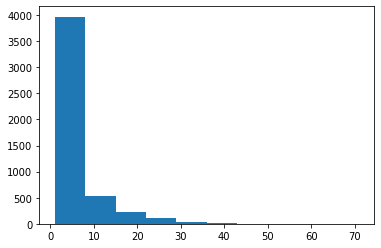

In [15]:
objects_num_list = [i[0] for i in objects_num]
plt.hist(objects_num_list)
plt.show()

In [11]:
object_dict = {'General trash':0, 'Paper':0, 'Paper pack':0, 'Metal':0, 'Glass':0, 'Plastic':0, 'Styrofoam':0, 'Plastic bag':0, 'Battery':0, 'Clothing':0}
for image_object in train_json['annotations']:
    object_dict[class_names[image_object['category_id']]] += 1
print(object_dict)

{'General trash': 3966, 'Paper': 6352, 'Paper pack': 897, 'Metal': 936, 'Glass': 982, 'Plastic': 2943, 'Styrofoam': 1263, 'Plastic bag': 5178, 'Battery': 159, 'Clothing': 468}


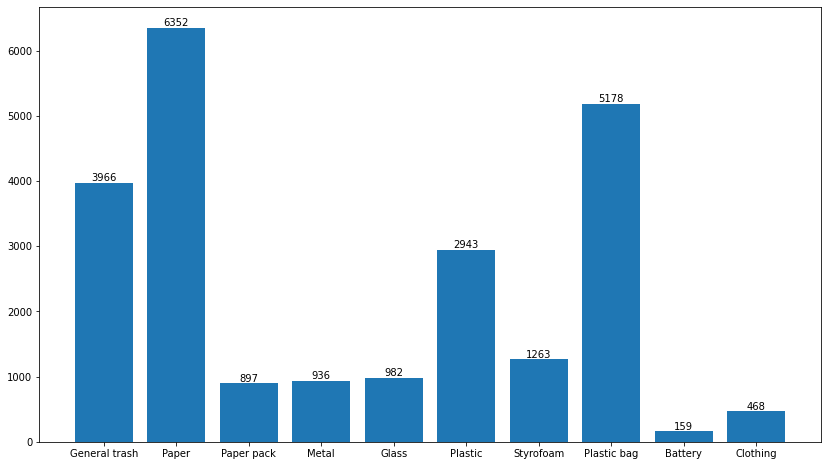

In [12]:
values = [i for i in object_dict.values()]
plt.figure(figsize=(14,8))
plt.bar(np.arange(10), values)
plt.xticks(np.arange(10), class_names)

for index, value in enumerate(values):
    plt.text(index, value, value,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()